In [1]:
# Import Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime

In [2]:
# Read in our data
Bit_df = pd.read_csv("./Resources/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv", index_col='Timestamp', parse_dates=True)
Bit_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Filter Bitcoin Data from March 2020 on 
bit_df = Bit_df[(Bit_df.index >= 1583020800)]
bit_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
1583020800,8525.00,8556.65,8520.00,8556.65,15.188068,129527.251330,8528.224534
1583020860,8554.83,8554.83,8545.10,8554.50,2.542385,21735.019049,8549.066809
1583020920,8554.24,8572.45,8554.24,8561.72,43.567942,373168.179460,8565.201069
1583020980,8559.03,8565.72,8554.80,8558.42,3.910809,33480.299759,8560.965136
1583021040,8565.54,8569.18,8565.54,8569.18,0.120000,1028.044200,8567.035000


In [4]:
bit_df.index = pd.to_datetime(bit_df.index, unit='s')
bit_df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2020-03-01 00:00:00,8525.00,8556.65,8520.00,8556.65,15.188068,129527.251330,8528.224534
2020-03-01 00:01:00,8554.83,8554.83,8545.10,8554.50,2.542385,21735.019049,8549.066809
2020-03-01 00:02:00,8554.24,8572.45,8554.24,8561.72,43.567942,373168.179460,8565.201069
2020-03-01 00:03:00,8559.03,8565.72,8554.80,8558.42,3.910809,33480.299759,8560.965136
2020-03-01 00:04:00,8565.54,8569.18,8565.54,8569.18,0.120000,1028.044200,8567.035000
...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


In [5]:
daily_bit = bit_df.resample('D').mean()
daily_bit

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2020-03-01,8556.604749,8562.353849,8551.417204,8557.230551,2.898586,24763.780914,8557.198635
2020-03-02,8746.719000,8752.039340,8741.713611,8746.592542,4.296431,37745.384814,8747.601872
2020-03-03,8790.435330,8795.959666,8785.272613,8790.052203,3.217493,28258.461004,8791.293455
2020-03-04,8760.567755,8765.097957,8756.284941,8760.307199,2.330252,20390.241542,8761.143371
2020-03-05,9018.717596,9023.838700,9014.494079,9019.141244,4.481366,40490.343865,9019.792646
...,...,...,...,...,...,...,...
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819


Text(0, 0.5, 'Close')

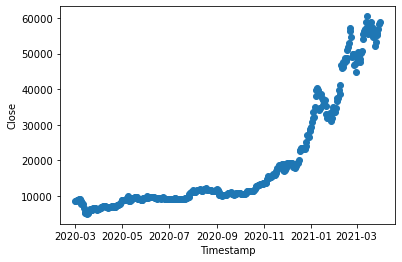

In [6]:
plt.scatter(daily_bit.index, daily_bit.Weighted_Price)
plt.xlabel('Timestamp')
plt.ylabel('Close')

In [7]:
# Train test split

to_row = int(len(daily_bit)*0.8)

training_data = list(daily_bit[0:to_row]['Close'])
testing_data = list(daily_bit[to_row:]['Close'])

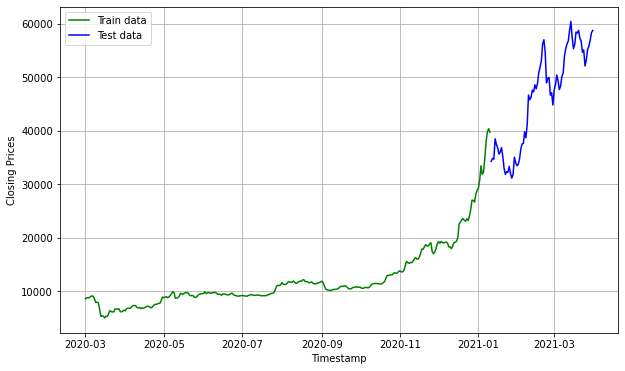

In [8]:
# Split data into train and testing set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Timestamp')
plt.ylabel('Closing Prices')
plt.plot(daily_bit[0:to_row]['Close'], 'green', label='Train data')
plt.plot(daily_bit[to_row:]['Close'], 'blue', label='Test data')
plt.legend()

In [9]:
model_predictions = []
n_test_obser = len(testing_data)

In [10]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output[0])[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

C:\Users\melen\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [11]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  394
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -3251.451
Method:                       css-mle   S.D. of innovations            928.343
Date:                Tue, 08 Mar 2022   AIC                           6514.903
Time:                        20:55:33   BIC                           6538.761
Sample:                             1   HQIC                          6524.357
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.9650     52.867      2.402      0.016      23.348     230.582
ar.L1.D.y      0.1732      0.050      3.439      0.001       0.074       0.272
ar.L2.D.y     -0.0423      0.051     -0.830      0.4

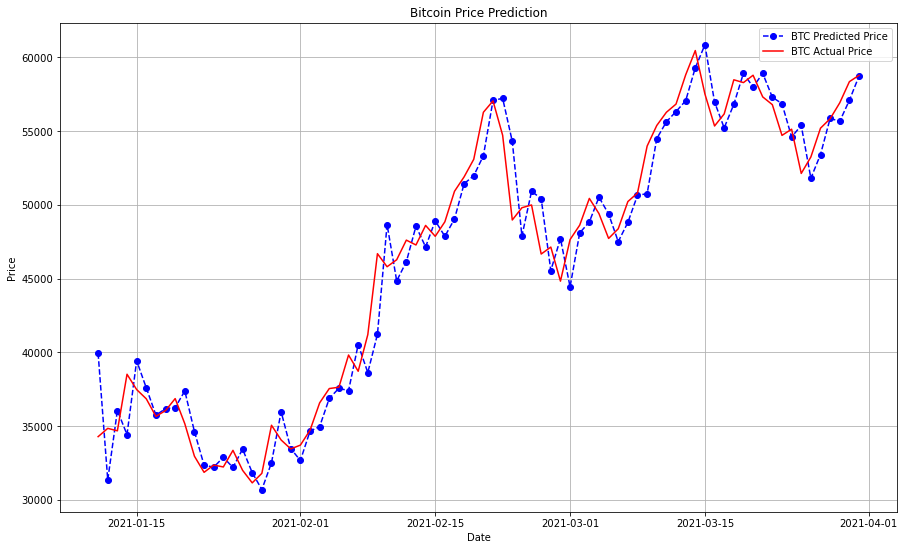

In [12]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = daily_bit[to_row:].index

plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='BTC Predicted Price')
plt.plot(date_range, testing_data, color='red', label='BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: ' + str(mape))

MAPE: 0.03516986762011755


### 3.5% MAPE implies the model is about 96.5% accurate in predicting the test set observations